In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"A:\THENMOZHI\100data_set\dl_bikesharing_regression\hour.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [5]:
df["dteday"]=pd.to_datetime(df["dteday"],format="%Y-%m-%d")

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(17379, 17)

In [11]:
df = df.drop(columns=["instant", "dteday", "casual", "registered"])

In [14]:
x=df.drop("cnt",axis=1)
y=df["cnt"]

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model=Sequential()
model.add(Dense(64,input_dim=x_train_scaled.shape[1],activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1))

model.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [19]:
result = model.fit(x_train_scaled,y_train,epochs=25,validation_split=0.2,batch_size=32)

Epoch 1/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 50203.1172 - mae: 154.6659 - val_loss: 20125.7812 - val_mae: 102.9132
Epoch 2/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21732.4941 - mae: 108.0372 - val_loss: 19563.5117 - val_mae: 101.8010
Epoch 3/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20166.1973 - mae: 104.3767 - val_loss: 18827.2441 - val_mae: 100.8589
Epoch 4/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20226.2188 - mae: 104.6515 - val_loss: 18051.0293 - val_mae: 97.5091
Epoch 5/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19388.6289 - mae: 101.2102 - val_loss: 17262.6660 - val_mae: 95.5823
Epoch 6/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18616.1758 - mae: 99.4184 - val_loss: 16595.7383 - val_mae: 91.7229
Epoch 7/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17465.1719 - mae: 95.6833 - val_loss: 15827.3975 - val_mae: 90.7749
Epoch 8/25
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17253.4434 - mae: 94.3360 - val_loss

In [20]:
result.history

{'loss': [35130.58984375,
  21100.708984375,
  20312.6640625,
  19759.427734375,
  19172.560546875,
  18407.185546875,
  17731.244140625,
  17020.373046875,
  15825.8857421875,
  14165.61328125,
  13106.5625,
  11981.09375,
  11126.734375,
  10601.30078125,
  9864.341796875,
  9385.51171875,
  8986.4501953125,
  8562.947265625,
  8364.3212890625,
  7793.09326171875,
  7344.0869140625,
  7049.65283203125,
  6721.9091796875,
  6532.4853515625,
  6081.70458984375],
 'mae': [129.53482055664062,
  106.36982727050781,
  104.25774383544922,
  102.98572540283203,
  100.92070007324219,
  98.7406005859375,
  96.36396026611328,
  93.70457458496094,
  89.54093170166016,
  84.08503723144531,
  79.93461608886719,
  75.56038665771484,
  72.34672546386719,
  69.80598449707031,
  66.8702392578125,
  64.85161590576172,
  63.3797721862793,
  61.81663131713867,
  60.89093017578125,
  59.121986389160156,
  57.52710723876953,
  56.59264373779297,
  55.38056182861328,
  54.244049072265625,
  52.7488250732421

In [22]:
result_df=pd.DataFrame(result.history)

In [23]:
result_df

,loss,mae,val_loss,val_mae
0,35130.589844,129.534821,20125.781250,102.913231
1,21100.708984,106.369827,19563.511719,101.800995
2,20312.664062,104.257744,18827.244141,100.858917
3,19759.427734,102.985725,18051.029297,97.509148
4,19172.560547,100.920700,17262.666016,95.582298
5,18407.185547,98.740601,16595.738281,91.722916
6,17731.244141,96.363960,15827.397461,90.774857
7,17020.373047,93.704575,14945.828125,87.691856
8,15825.885742,89.540932,13269.918945,78.629028
9,14165.613281,84.085037,12043.820312,75.598732


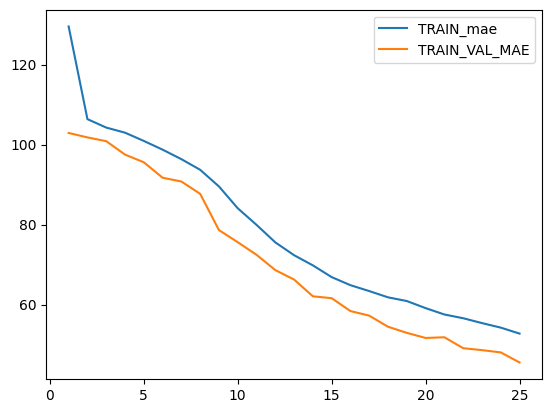

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1,26),result_df["mae"],label="TRAIN_mae")
plt.plot(range(1,26),result_df["val_mae"],label="TRAIN_VAL_MAE")
plt.legend()
plt.show()

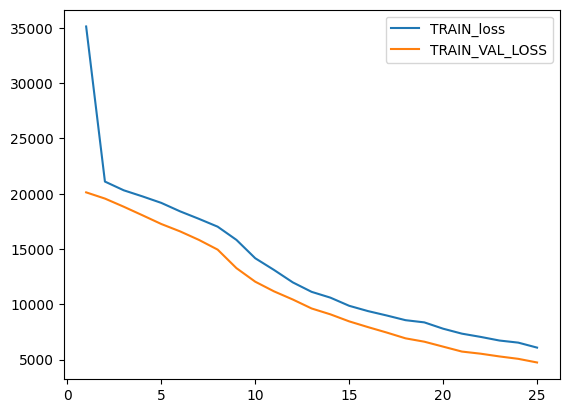

In [26]:
plt.plot(range(1,26),result_df["loss"],label="TRAIN_loss")
plt.plot(range(1,26),result_df["val_loss"],label="TRAIN_VAL_LOSS")
plt.legend()
plt.show()

In [27]:
loss, mae = model.evaluate(x_test_scaled, y_test)
print("MAE:", mae)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4441.5317 - mae: 43.8983
MAE: 43.85588073730469


In [28]:
model.save("bike_sharing.h5")

In [29]:
import pickle

with open ("scaler.pkl","wb")as f:
    pickle.dump(scaler,f)
    

In [32]:
print(x_train.columns.tolist())
print("Total features used in model:", x_train.shape[1])

['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'hour']
Total features used in model: 13
